# MATH 210 Introduction to Mathematical Computing

## November 9, 2018

* Linear regression

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

## Linear regression

We want to find the coefficient vector $\mathbf{a}$ such that the squared distance

$$
|| X\mathbf{a} - \mathbf{y} ||^2
$$

is minimized. Note that the solution $\mathbf{a}$ is such that $X\mathbf{a} - \mathbf{y}$ is perpendicular to the column space and therefore

$$
X^T(X\mathbf{a} - \mathbf{y}) = \mathbf{0}
$$

and so we need to solve $(X^T X)\mathbf{a} = X^T \mathbf{y}$. Let's make some fake data.

In [2]:
N = 2000
x = 100*np.random.rand(N)
noise = 8*np.random.randn(N)
y = 0.372*x + 21.712 + noise

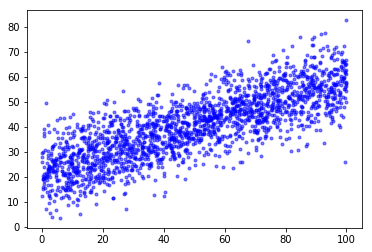

In [3]:
plt.plot(x,y,'b.',alpha=0.5,lw=0)
plt.show()

Create the vandermonde matrix:

In [4]:
X = np.column_stack([np.ones(N),x])

In [5]:
a = la.solve(X.T @ X, X.T @ y.reshape(N,1))

In [6]:
a

array([[ 21.8958106 ],
       [  0.37061808]])

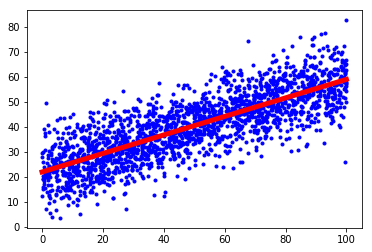

In [7]:
x_line = np.linspace(0,100,5)
y_line = a[0] + a[1]*x_line
plt.plot(x,y,'b.')
plt.plot(x_line,y_line,'r',lw=5)
plt.show()

Let's work with some real data. [Kobe Bryant](https://www.basketball-reference.com/players/b/bryanko01.html) has the [third highest total points in NBA history](https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_career_scoring_leaders). Perform linear regression on his points per game from 2006 to 2016.

In [8]:
kobe = np.array([35.4,31.6,28.3,26.8,27,25.3,27.9,27.3,13.8,22.3,17.6])

In [9]:
len(kobe)

11

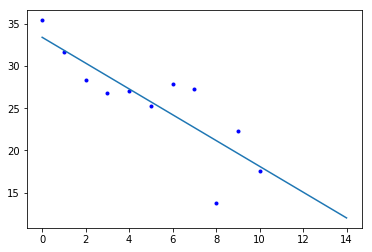

In [10]:
x = np.arange(0,11)
y = kobe
X = np.column_stack([np.ones(11),x])
a = la.solve(X.T @ X, X.T @ y.reshape(11,1))
y_line = a[0] + a[1]*np.arange(0,15)
plt.plot(x,y,'b.',np.arange(0,15),y_line)
plt.show()